<a href="https://colab.research.google.com/github/Prrriiitam/Loan_Credit_Risk/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df = pd.read_csv('/content/drive/MyDrive/German_Credit/german_credit_data.csv')

In [61]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [62]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [63]:
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [64]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [66]:
df.duplicated().sum()

np.int64(0)

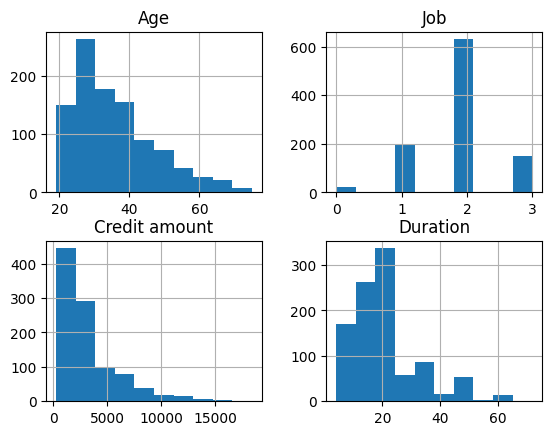

In [67]:
df.hist()
plt.show()

We have fix sav acc and checking acc

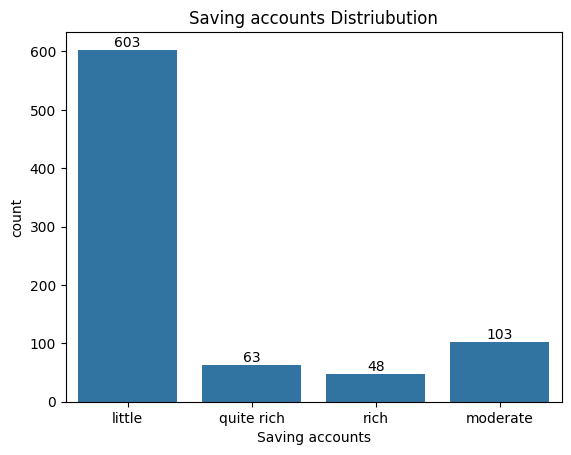

In [68]:
plt.title('Saving accounts Distriubution')
sns.countplot(x='Saving accounts', data=df)  # tells it to count how many times each category appears in the Saving accounts
for c in plt.gca().containers:  #This code is adding value labels (numbers) on top of each bar in the bar chart.
    plt.gca().bar_label(c)
plt.show()

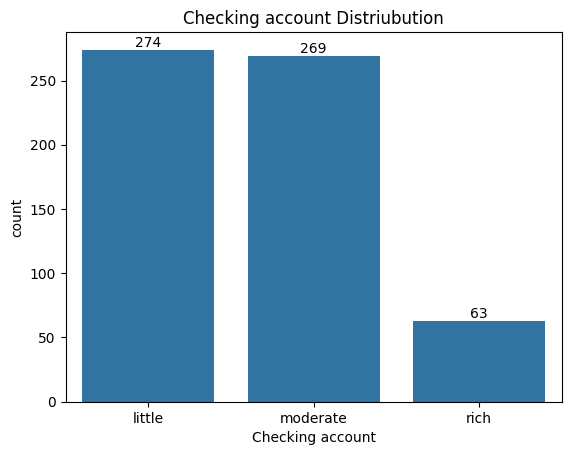

In [69]:
plt.title('Checking account Distriubution')
sns.countplot(x='Checking account', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

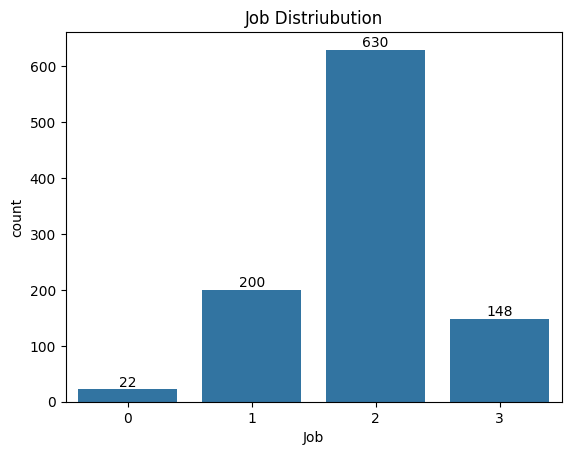

In [70]:
plt.title('Job Distriubution')
sns.countplot(x='Job', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

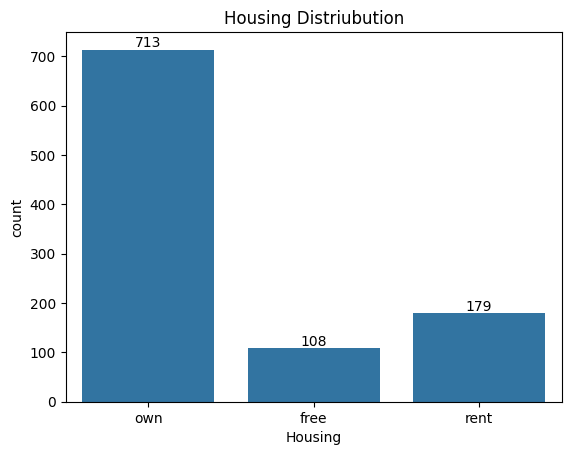

In [71]:
plt.title('Housing Distriubution')
sns.countplot(x='Housing', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

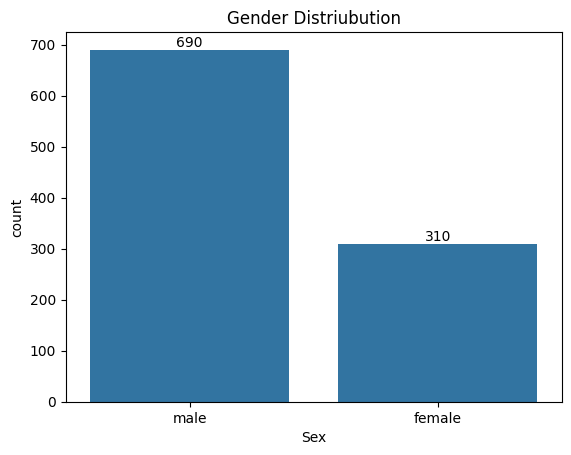

In [72]:
plt.title('Gender Distriubution')
sns.countplot(x='Sex', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

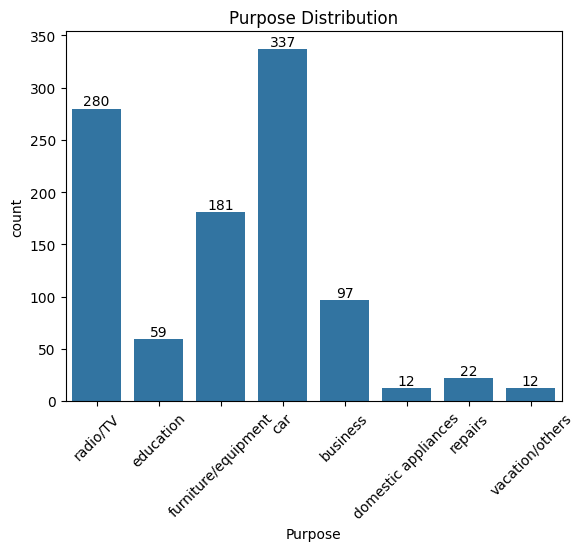

In [73]:
plt.title('Purpose Distribution')
sns.countplot(x='Purpose', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.xticks(rotation=45)
plt.show()

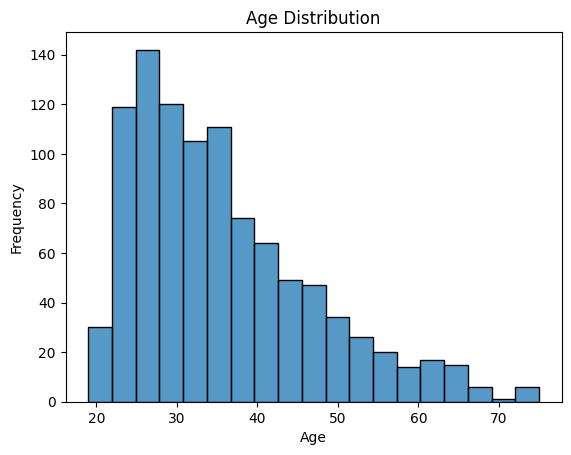

In [74]:
plt.title('Age Distribution')
sns.histplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

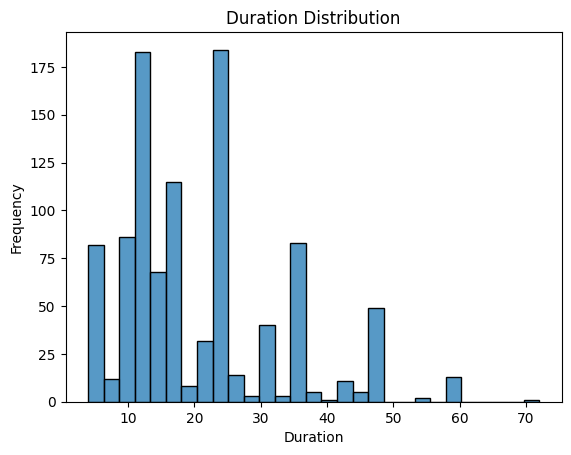

In [75]:
plt.title('Duration Distribution')
sns.histplot(data=df, x='Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [76]:
modal_val = df['Saving accounts'].mode()[0]
df['Saving accounts'].fillna(modal_val, inplace=True)

# df['Saving accounts'].mode() returns a Series of the most common values.
# [0] picks the first mode (if there’s a tie, only the first is used).

# Replaces all NaN (null) values in the Saving accounts column with modal_val.
# inplace=True means it changes the original DataFrame directly (doesn’t create a copy).


modal_val = df['Checking account'].mode()[0]
df['Checking account'].fillna(modal_val, inplace=True)

<ipython-input-76-4bfe254f0eaf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(modal_val, inplace=True)
<ipython-input-76-4bfe254f0eaf>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


#Now we will fix label data to numerical data

In [78]:
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [79]:
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
# fit_transform() does two things:
#  1. Fits the encoder on the column (i.e., learns all unique labels).
#  2. Transforms those labels into numbers.



In [80]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


#Now we will do scaling this is necessary for this types of projects where there are numerical data if we donot do this then features with large values may dominate.

In [81]:
# standardize the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# fit_transform() does two things:
# Calculates the mean and standard deviation of each column (fit)
# Applies the transformation (transform):

#Preprocessing is done now clustering

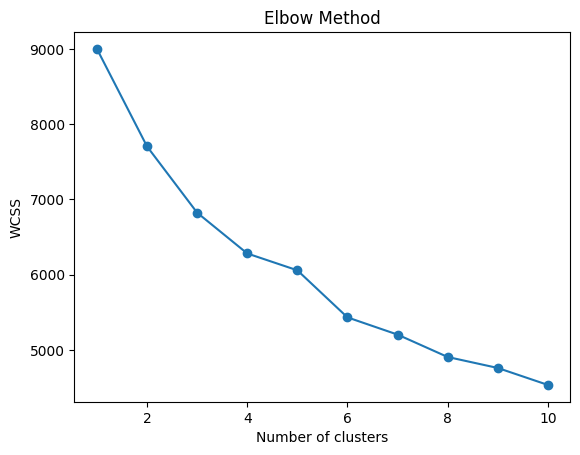

In [82]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# We have checked that what should be optimal number of clusters by elbow method and its shows robably 3-4 as in the above plot 1-2-3 decreses sharply but from 3-4 its starts to be flatten so optimally 3-4 but here in this project we have to classify persons with either good or bad credit risk so here we will use number of clusters = 2.

In [83]:
# using K-Means clustering model with 2 clusters

model = KMeans(n_clusters=2)
model.fit(df_scaled)

#Fits the model on your scaled dataset df_scaled. This is when the clustering happens — KMeans finds 2 centroids and assigns each data point to the nearest one.

KMeans(n_clusters=2)

In [84]:
labels = model.labels_
df_clustered = pd.concat([df, pd.DataFrame({'Risk':labels})], axis = 1)
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,0


In [85]:
df_clustered.Risk.value_counts()


,count
Risk,
1,750
0,250


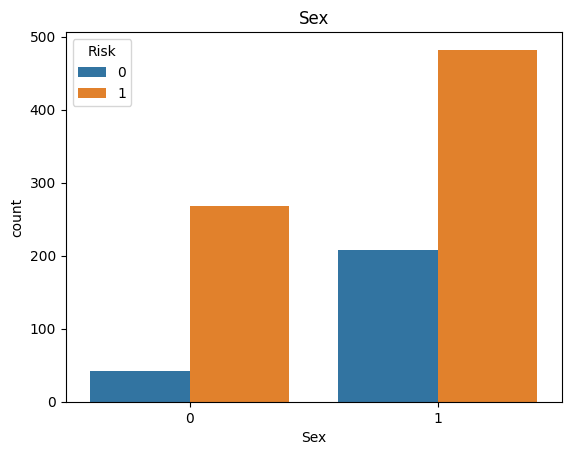

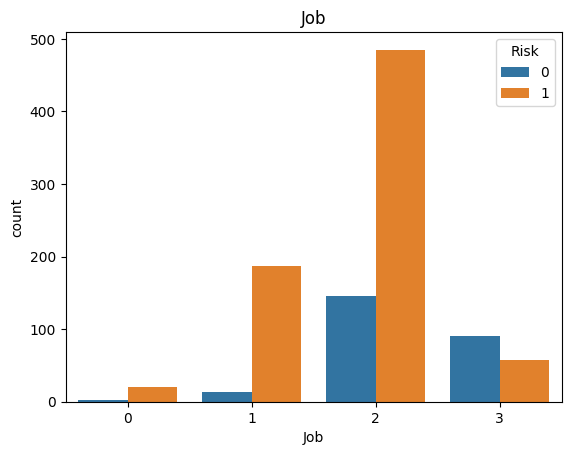

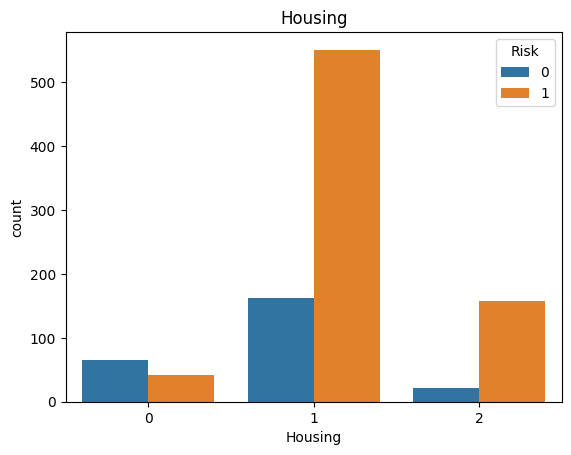

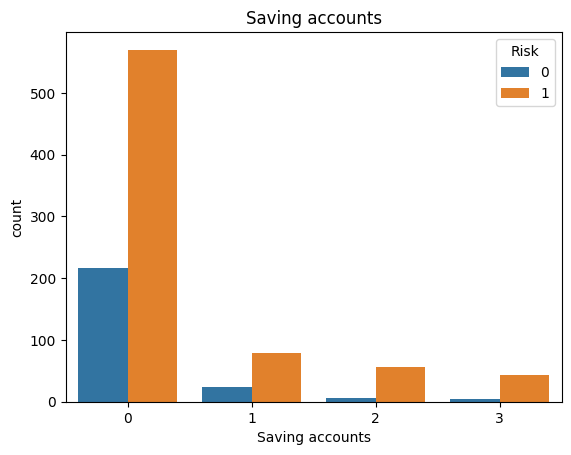

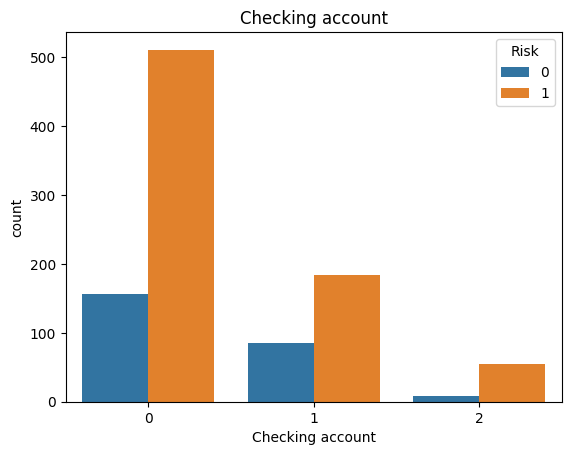

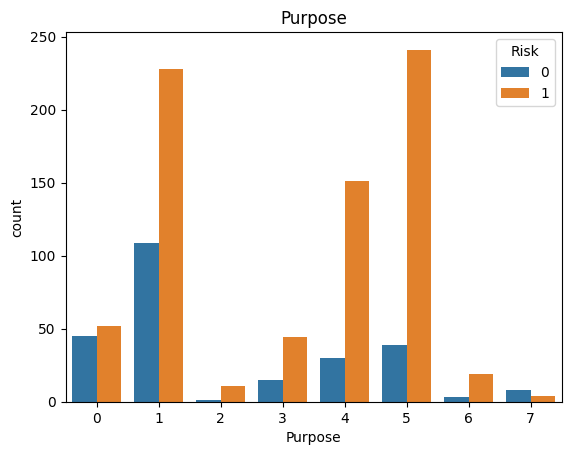

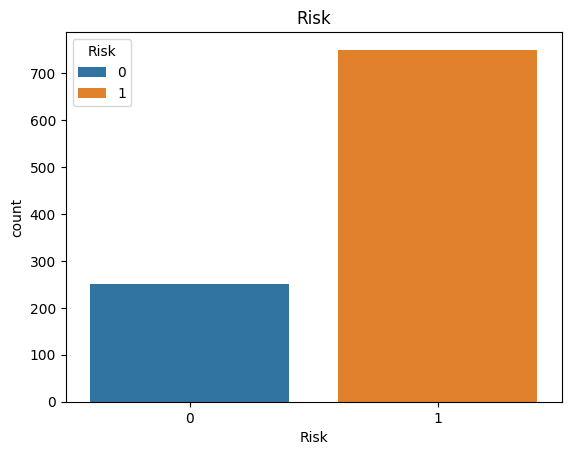

In [89]:
cols_list = ["Age", "Sex", "Job","Housing","Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose", "Risk"]
col_list = ["Sex", "Job","Housing","Saving accounts", "Checking account", "Purpose", "Risk"]

data = df_clustered.loc[:, col_list] #creates a new DataFrame
for i in col_list:
    plt.figure()
    sns.countplot(x = i, data = data, hue="Risk")
    plt.title(i)

# Use hue="Risk", which means the count plot will show the distribution of the "Risk" column (likely binary, with values like 0 or 1) within each category of the column i. This helps visualize how the risk labels are distributed for each category.



Scaling is a common preprocessing step in machine learning because many algorithms (e.g., linear regression, neural networks) perform better when the features are on the same scale.

In [90]:
df_clustered[cols_list[:-1]] = scaler.fit_transform(df_clustered[cols_list[:-1]]) #The code scales all the numerical features in df_clustered, except for the "Risk" column.

In [91]:
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.745131,-1.236478,1.073263,1
1,-1.191404,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.949817,2.248194,1.073263,0
2,1.183312,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.416562,-0.738668,0.061705,1
3,0.831502,0.670280,0.146949,-2.016956,-0.463409,-0.653831,1.634247,1.750384,0.567484,0
4,1.535122,0.670280,0.146949,-2.016956,-0.463409,-0.653831,0.566664,0.256953,-0.949853,0


In [93]:
dff = df_clustered.iloc[:]  #created a copy
dff.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.745131,-1.236478,1.073263,1
1,-1.191404,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.949817,2.248194,1.073263,0
2,1.183312,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.416562,-0.738668,0.061705,1
3,0.831502,0.670280,0.146949,-2.016956,-0.463409,-0.653831,1.634247,1.750384,0.567484,0
4,1.535122,0.670280,0.146949,-2.016956,-0.463409,-0.653831,0.566664,0.256953,-0.949853,0


#Now evaluate using supervised learning

In [94]:
y = dff['Risk']
dff.drop(["Risk"], axis=1,inplace= True)
x = dff
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [95]:
# use GridSearchCV to find the best hyperparameter for the model

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], #The number of trees in the forest.
    'max_depth': [3, 5, 10, None], #The maximum depth of the trees.
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4, 8] #The minimum number of samples required to be at a leaf node.
}

gsv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# cv=5: The number of cross-validation folds. This means the data will be split into 5 folds, and the model will be trained and validated 5 times on different subsets of the data.
#This uses all available CPU cores to perform parallel computation for faster training.

gsv.fit(x_train, y_train)

best_rf = gsv.best_estimator_
print("Best hyperparams:", best_rf)



# What does random_state do?
# The random_state controls the randomness in:
# Random sampling of data: When the model splits the data into training and testing sets, it shuffles the data before splitting. If you set random_state=42, the shuffling will always happen in the same way, producing the same split each time.


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparams: RandomForestClassifier(max_depth=10, random_state=42)


model performs well on max_depth=10 and rest with their default value
n_estimators =100, min_samples_split = 2, min_samples_leaf = 1

In [96]:
import joblib

model_path = '/content/drive/MyDrive/randomForestCredits.joblib'

joblib.dump(best_rf, model_path)

print(f"Model saved to {model_path}")


Model saved to /content/drive/MyDrive/randomForestCredits.joblib


In [99]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the labels
y_pred = best_rf.predict(x_test)



In [103]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], d

In [102]:
# Count the number of 1's
num_ones = np.count_nonzero(y_pred == 1)

# Count the number of 0's
num_zeros = np.count_nonzero(y_pred == 0)

print(f"Number of 1's: {num_ones}")
print(f"Number of 0's: {num_zeros}")

Number of 1's: 241
Number of 0's: 59


[[ 57   3]
 [  2 238]]

Accuracy Score: 0.9833333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.99      0.99      0.99       240

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



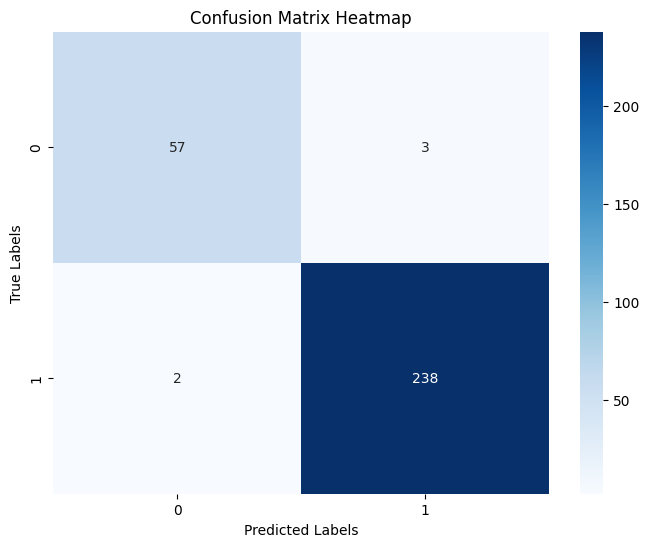

In [107]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix, accuracy score, and classification report
print(cm)
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()